<a href="https://colab.research.google.com/github/yeomko22/data_analytics_camp_2023_share/blob/main/week19_deeplearning_nlp/ch19_8_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch19_8 Attention Mechanism

이전 챕터에서 seq2seq 기계 번역 모델에 대해서 배워봤습니다. seq2seq 모델은 encoder로 입력 시퀀스의 임베딩을 추출하고, decoder를 이용해서 번역 텍스트를 생성하였습니다. seq2seq 모델 구조부터 살펴보겠습니다.

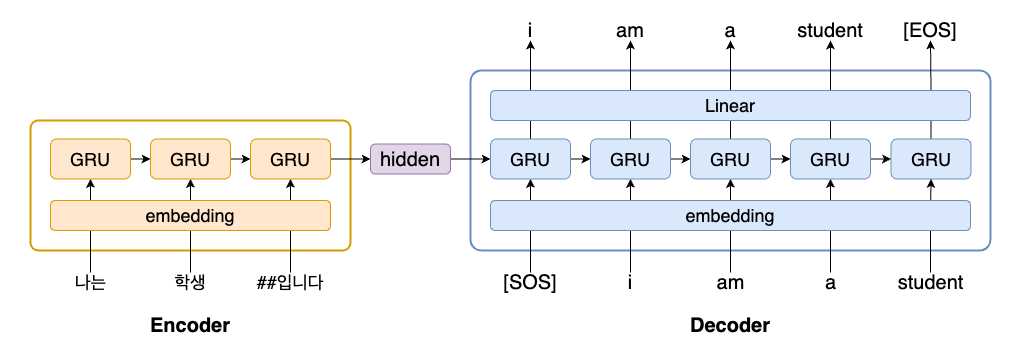

그런데 이는 두가지 문제가 있었습니다. 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생합니다. 특히 입력 시퀀스 길이가 길어질 수록 담아야는 정보는 많아지는데 벡터의 크기는 제한적입니다.

디코더 단에서도 시퀀스의 길이가 길어질 수록 인코더에서 전달받은 hidden state가 희석되어 번역의 품질이 떨어집니다.

때문에 긴 시퀀스에 대해서도 번역의 품질을 유지할 수 있는 연구들이 이어져 왔고, 이 때 제안된 것이 Attention Mechanism입니다.


## Attention Mechanism

어텐션의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점입니다. 단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보게 됩니다. 예를 들어 아래 문장을 사람이 번역한다고 생각해보겠습니다.


- 입력 문장: 안녕하세요, 만나서 반갑습니다. 제 이름은 마이크입니다. 제 취미는 자전거 타기입니다.
- 출력 문장: Hello, nice to meet you. My name is Mike. My hobby is riding a bike.

사람이 번역을 한다면 앞에서부터 Hello 부터 순차적으로 번역을 할 것입니다. 그러다 막히면 입력 문장이 뭐였는지 다시 돌아가서 볼 것입니다. 그리고 이 때, 번역해야하는 부분에 집중할 것입니다. 어디에 집중할 지를 결정하기 위해 Attention Score라는 것을 계산해야합니다.

### Attention Score

우리가 알고 싶은건 현재 시점에 번역을 해야하는데 입력의 어느 부분에 주목해야하는 지입니다. 이를 수치화 한 것이 Attention Score입니다. 예시를 통해서 알아보겠습니다.

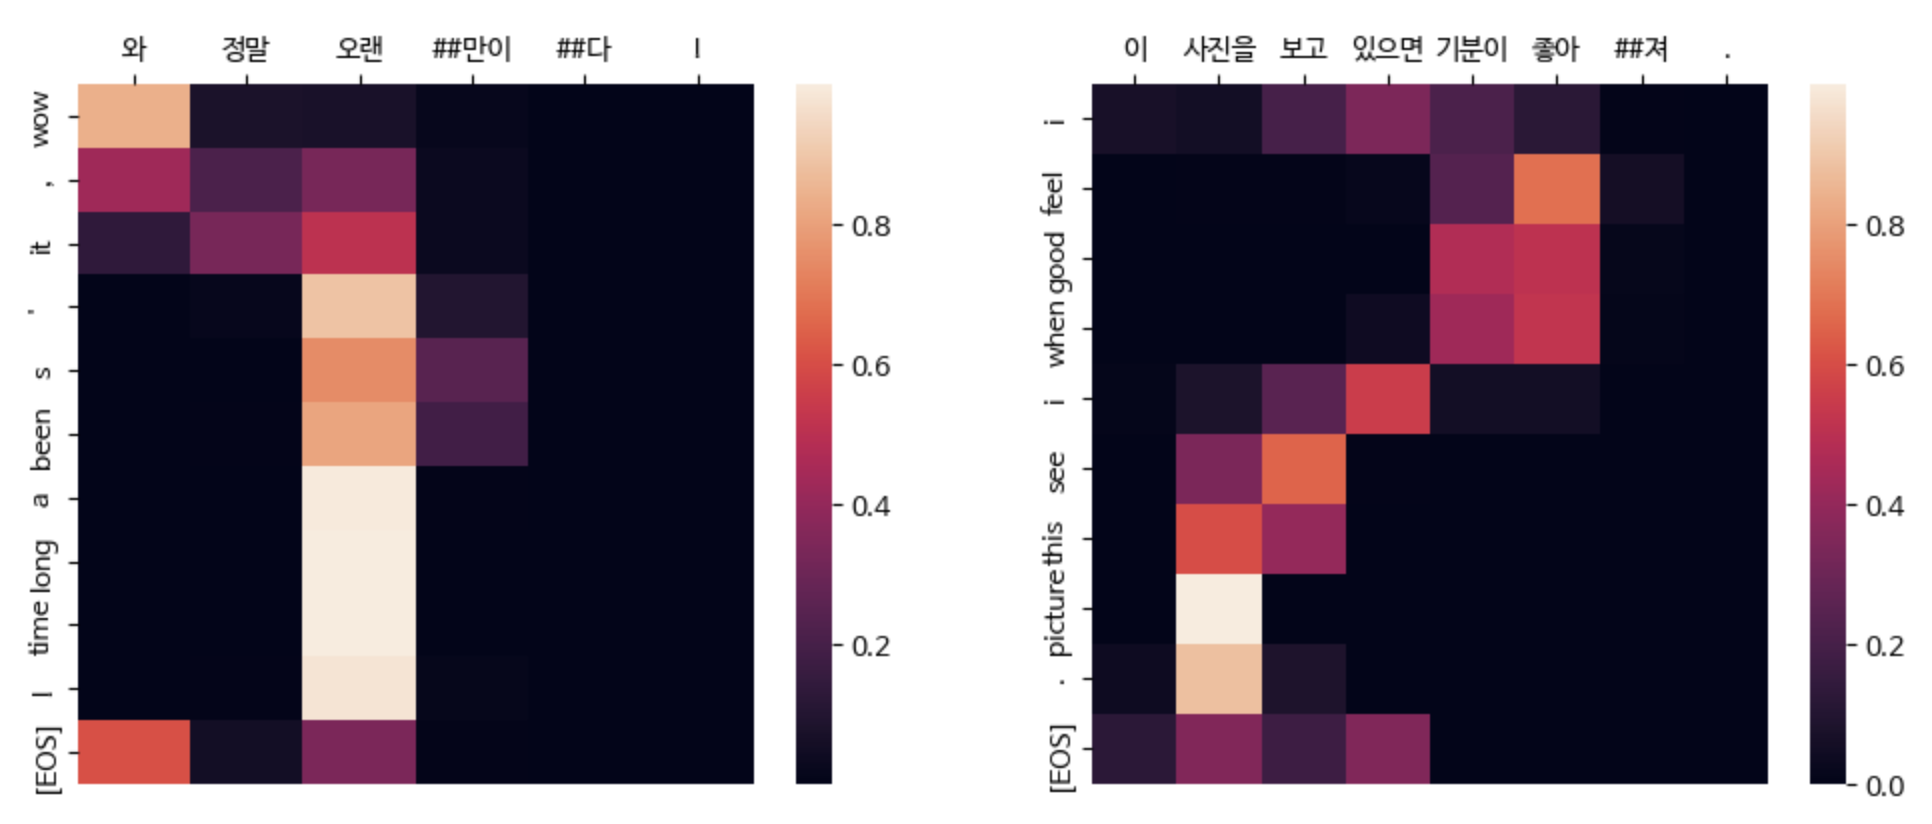

"와 정말 오랜만이다" 라는 문장을 번역할 때, 각 시점에 Attention Score를 시각화 한 것입니다. wow로 번역하는 시점에서는 "와"에 주목하고, "오랜만이다"를 번역할 때는 "it's been a long time"에 주목합니다.

두 번째 예시는 "이 사진을 보고 있으면 기분이 좋아져"를 번역할 때 Attention Score입니다. "사진"에 주목하여 "pictures"라고 번역을 하게 됩니다. 이렇듯 얼만큼 주목해야하는지를 결정하는 것이 attention score 입니다.

### Query, Key, Value

Attention Mechanism을 함수로 표현하면 다음과 같습니다.

$$Atteion(Q,K,V)=Attention\;Score$$

먼저 Key-Value로 이루어진 데이터 셋이 있다고 가정하겠습니다. Query가 주어졌을 때, Key와 유사도를 계산한 뒤, 이 유사도를 가중치로 삼아서 Value에 곱해주어 Attention Score를 계산하게 됩니다.



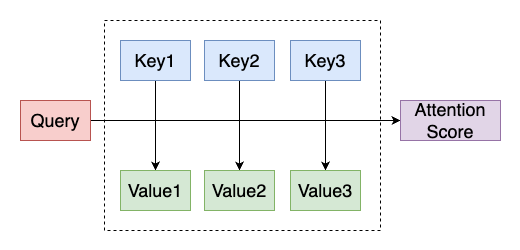

- Query: t 시점에서의 decoder의 hidden state
- Key: 모든 시점에서의 encoder의 hidden state
- Value: 모든 시점에서의 encoder의 hidden state

 우리는 매 시점, 번역을 수행할 때 입력 시퀀스의 어디에 주목해야하는지 Attention Score를 구하고 싶습니다. 이 때의 Query는 디코더의 현재 시점에서의 hidden state입니다.

 그 다음, 우리의 Query와 유사도를 비교할 대상 Key는 encoder의 모든 시점의 hidden state입니다. Query와 Key의 유사도를 계산한 다음, 이를 Value에 곱해주어 Attention Score를 계산하게 됩니다. 이 때, Attention을 계산하는 방식도 여러 기법이 존재합니다.

### Dot Product Attention

가장 단순한 형태의 dot product attention에 대해서 알아보겠습니다.

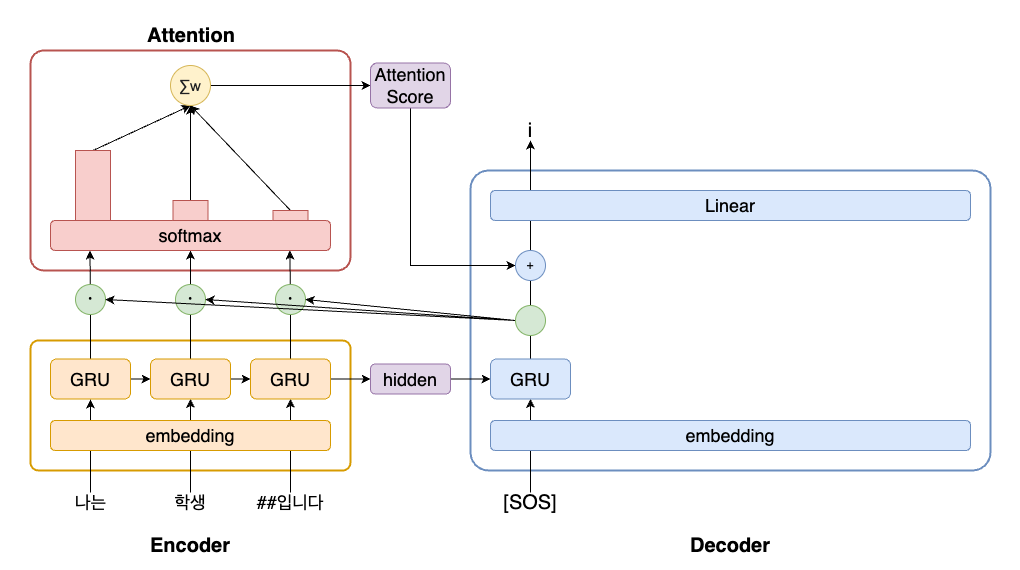

먼저 decoder의 t 시점 hidden state를 encoder의 모든 시점의 hidden state와 유사도를 비교해줍니다. 벡터의 유사도 비교는 내적을 이용해서 계산합니다. (코사인 유사도 계산과 비슷합니다.) 그 다음, 이 값에 Softmax를 취해줍니다. 이 것이 Query와 Key 사이 유사도를 계산하는 부분입니다.

그 다음, 이렇게 계산한 weight 값을 다시 encoder의 hidden state에 곱해준 뒤, 모두 합쳐주어 attention score를 계산합니다. 이 과정이 Value에 가중치를 적용하는 부분입니다.

이렇게 구한 attention score를 decoder hidden state에 concat 해준 뒤, linear layer를 통과하여 예측 값을 출력합니다. 이 과정을 매 예측마다 반복해줍니다.

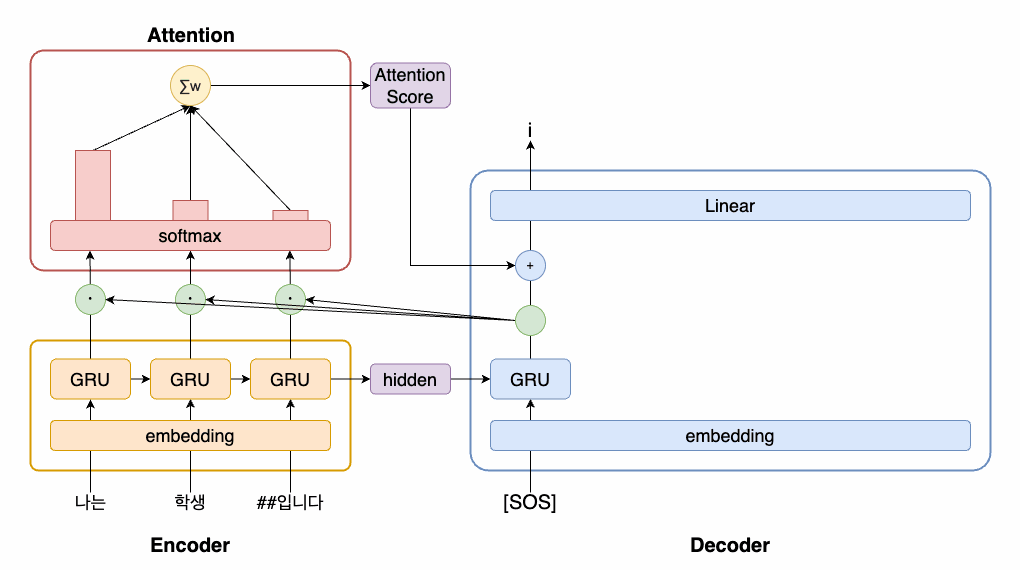

## Attention Mechanism의 장점

### 긴 시퀀스에 대해서 번역 품질 유지

먼저 시퀀스 길이가 길어질 수록 번역 품질이 떨어지는 문제를 비약적으로 해결해줍니다. 아래는 대표적인 attention 기법 중에 하나인 Badahnau Attention 논문에서 가져온 도표입니다. Attention을 적용하지 않은 seq2seq 모델의 경우, 시퀀스의 길이가 길어질 수록 bleu score가 급격히 떨어집니다. 반면에 가장 위에 보이는 Attention을 적용한 모델의 경우 성능이 유지됩니다.

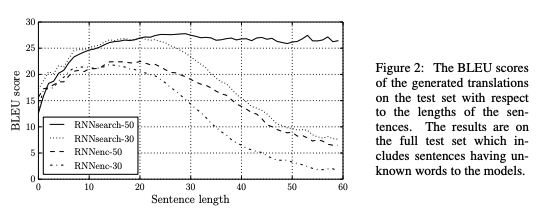

### 해석 가능성


입력 시퀀스의 어느 부분에 주목하여 번역을 수행했는지를 시각화 할 수 있어서 해석 가능성이 좋습니다. 이를 통해서 자연어 처리 모델을 이해할 수 있게 되었습니다.

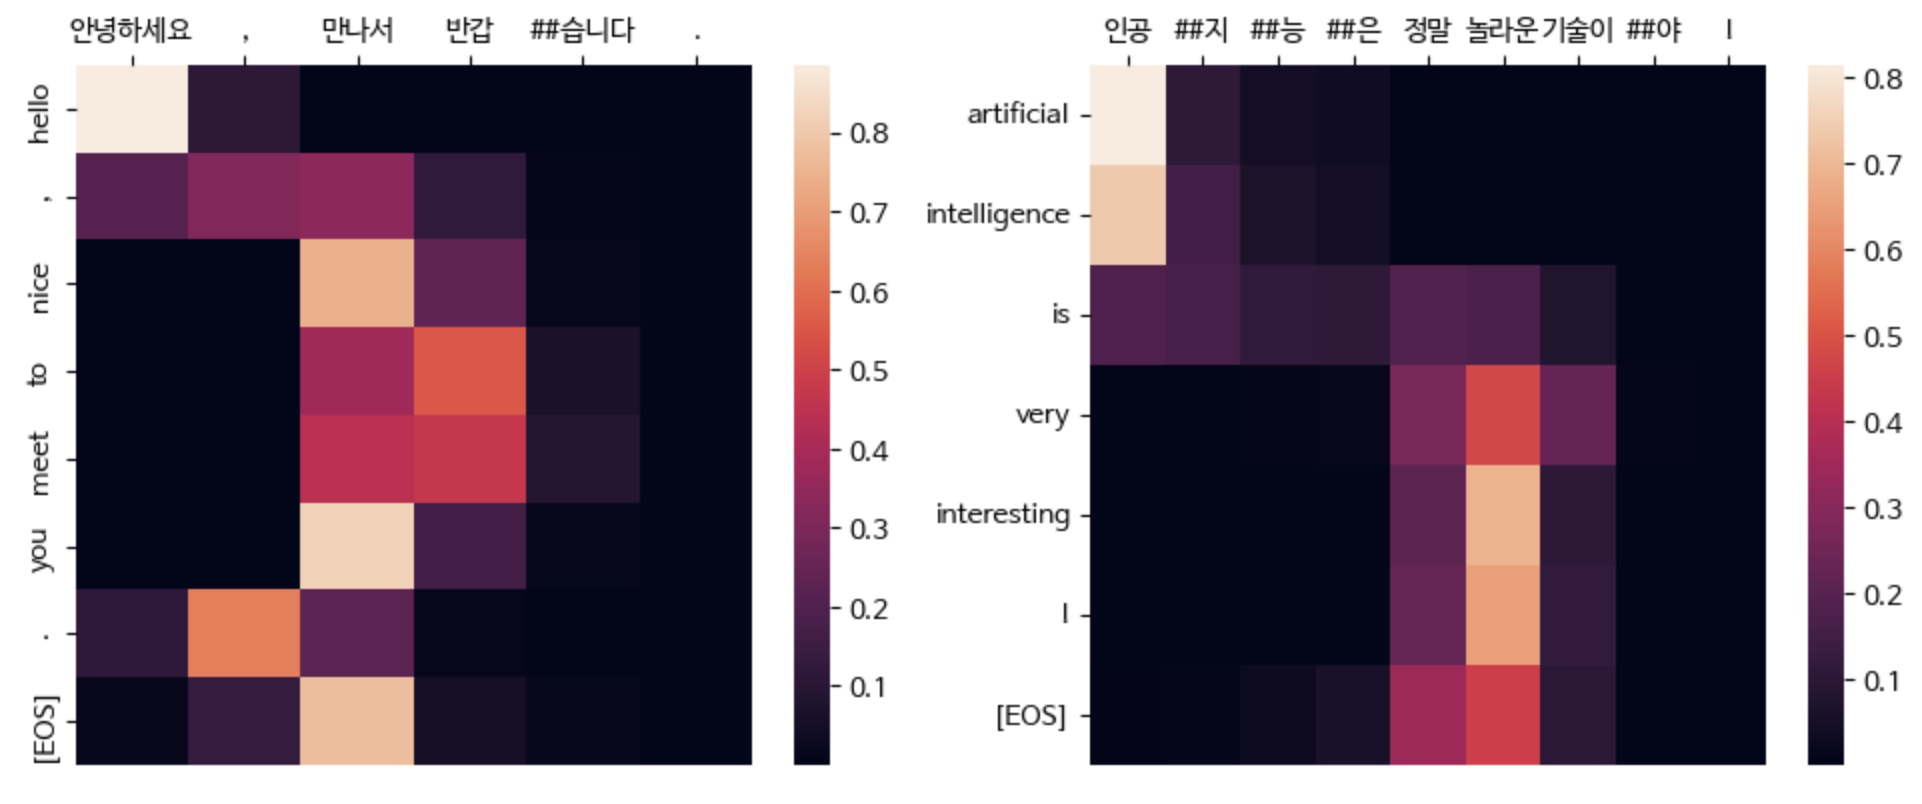

## Attention Mechanism 단점


### 학습 속도가 느려짐

Attention Mechanism을 적용하면 매번 RNN을 통과할 때마다 Attention 연산을 해주어야 합니다. 코드가 무척 복잡해지고, 학습에 오랜 시간이 걸립니다. 가뜩이나 느린 RNN을 더 느리게 만듭니다. 때문에 모델의 크기와 학습할 수 있는 데이터의 양에 제약이 걸립니다. 이는 transformer 모델이 등장하게 된 배경이 됩니다.

## 정리

이번 챕터에서는 Attention이라는 딥러닝을 이용한 NLP 분야에서 아주 중요한 개념에 대해서 살펴보았습니다. Query, Key, Value를 이용하여 Attention을 계산하는 방식은 Transformer 모델도 사용하는 방식이므로 잘 이해하고 넘어갔으면 좋겠습니다.